# SYDE556/750 Assignment 4: Nengo and Dynamics

- Due Date: March 13th (midnight)
- Total marks: 10 (10% of final grade)
- Late penalty: 1 mark per day

- For this assignment, you must use Nengo, which can be downloaded from http://github.com/nengo/nengo.  Instructions for installing are [here](https://github.com/nengo/nengo/blob/master/README.rst).
    - Feel free to look through the examples folder before doing this assignment.
- You can also use Nengo GUI if you'd like: https://github.com/nengo/nengo_gui

In [1]:
%pylab inline
import numpy as np
import nengo



Populating the interactive namespace from numpy and matplotlib


## 1) Building an ensemble of neurons

Make a new model and inside that model make an ensemble of neurons.  It should have 100 neurons, and represent a 1-dimensional space.  The intercepts should be between -1 and 1, and the maximum firing rates should be between 100Hz and 200Hz.  $\tau_{RC}$ should be 0.02s and $\tau_{ref}$ should be 0.002s.

In [5]:
N = 100
model = nengo.Network(label='Neurons')
with model:
    neurons = nengo.Ensemble(N, dimensions=1, max_rates=nengo.dists.Uniform(100,200)) 

    connection = nengo.Connection(neurons, neurons, solver=nengo.solvers.LstsqNoise(noise=0.2))
    
sim = nengo.Simulator(model)

d = sim.data[connection].weights.T    

Building finished in 0:00:01.                                                   


<ol style="list-style:lower-alpha outside none;" start="1">
<li>[1 mark] Plot the tuning curves. Plot the representation accuracy plot ($x$ and $\hat{x}$ on the same plot).  Compute and report the RMSE.</li></ol>

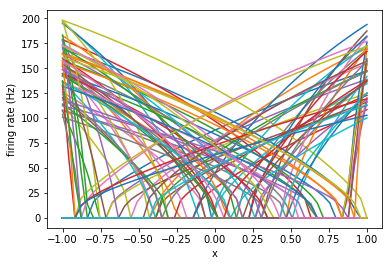

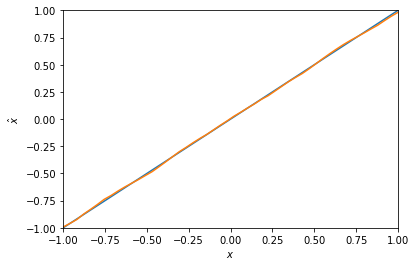

In [13]:
x, A = nengo.utils.ensemble.tuning_curves(neurons, sim)

plt.plot(x, A)
plt.xlabel('x')
plt.ylabel('firing rate (Hz)')
plt.show();

xhat = np.dot(A, d)
plt.figure()
plt.plot(x, x)
plt.plot(x, xhat)
plt.xlabel('$x$')
plt.ylabel('$\hat{x}$')
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.show();

<ol style="list-style:lower-alpha outside none;" start="2">
<li>[1 mark] What happens to the RMSE as the radius increases?  Why?  Provide four example points (i.e., RMSE at various radiuses).  (Note: Nengo will automatically rescale the intercepts as the radius increases, but plot tuning curves in a normalized range.)</li>
</ol>

<ol style="list-style:lower-alpha outside none;" start="3">
<li>[0.5 marks] What happens to the RMSE and the tuning curves as $\tau_{ref}$ changes between 1-5ms? Show plots.  Why?</li>
</ol>

<ol style="list-style:lower-alpha outside none;" start="4">
<li>[0.5 marks] What happens to the RMSE and the tuning curves as $\tau_{RC}$ changes between 10-100ms? Show plots. Why?</li>
</ol>

## 2) Connecting neurons

Make a second ensemble of spiking neurons.  It should have the same parameters as the first ensemble of neurons (from the first question), but have only 50 neurons in it.  Connect the first ensemble to the second such that it computes the identity function, using a post-synaptic time constant of 0.01.  Create an input that is a value of 1 for 0.1<t<0.4 seconds, and otherwise is zero (you can use a lambda function).

<ol style="list-style:lower-alpha outside none;" start="1">
<li>[1 mark] Show the input value and the decoded values from the two ensembles in three separate plots.  Run the simulation for 0.5 seconds.</li>
</ol>

<ol style="list-style:lower-alpha outside none;" start="2">
<li>[1 mark] Make a new version of the model where instead of computing the identity function, it computes `y=1-2*x`.  Show the same graphs as in part (a).</li>
</ol>

## 3) Dynamics

Build a neural integrator.  This consists of one ensemble, one input, a connection from the input to the ensemble, and a connection from the ensemble back to itself.  The ensemble should have 200 neurons and the same parameters as in question 1.  The post-synaptic time constant of the recurrent connection is 0.05, and the post-synaptic time constant of the input is 0.005.  

To be an integrator, the desired dynamical system is ${{dx} \over {dt}} = u$.  To implement this with the NEF, we use the transformation discussed in class, so the feedback connection should compute $f'(x)=x$ and the input connection should compute $g'(x)=\tau u$, where $u$ is the input and $\tau$ is the post-synaptic time constant of the *feedback* connection.  So the feedback connection should compute the identity function and the input connection should compute 0.05 times the input.

For all probes, use a synapse of 0.01.  It can help to explicitly plot the ideal when answering the questions.

<ol style="list-style:lower-alpha outside none;" start="1">
<li>[1 mark] Show the input and the value represented by the ensemble when the input is a value of 0.9 from t=0.04 to t=1.0 (and 0 for other times).  Run the simulation for 1.5 seconds.  What is the expected ideal result (i.e. if we just mathematically computed the integral of the input, what would we get?)  How does the simulated output compare to that ideal?</li></ol>

<ol style="list-style:lower-alpha outside none;" start="2">
<li>[1 mark] Change the neural simulation to rate mode (use `model.config[nengo.Ensemble].neuron_type = nengo.LIFRate()` which will change all neurons in the simulation to LIF rate neurons).  Re-run the simulation in rate mode.  Show the resulting plots.  How does this compare to the result in part (a)?</li></ol>

<ol style="list-style:lower-alpha outside none;" start="3">
<li>[1 mark] Returning to spiking mode, change the input to be a value of 0.9 from t=0.04 to 0.16.  Show the same plots as before (the input and the value represented by the ensemble over 1.5 seconds).  How does this compare to (a)?  Why is it better or worse?</li></ol>

<ol style="list-style:lower-alpha outside none;" start="4">
<li>[1 mark] Change the input to a ramp input from 0 to 0.9 from t=0 to t=0.45 (and 0 for t>0.45). Show the same plots as in the previous parts of this question.  What does the ensemble end up representing, and why?  What is the (ideal) equation for the curve traced out by the ensemble?</li></ol>

<ol style="list-style:lower-alpha outside none;" start="5">
<li>[1 mark] Change the input to `5*sin(5*t)`.  What should the value represented by the ensemble be (write the equation)?  How well does it do?  What are the differences between the model's behaviour and the expected ideal behaviour?</li></ol>

<ol style="list-style:lower-alpha outside none;" start="6">
<li>[Bonus, up to 2 marks] Implement a nonlinear dynamical system we have not seen in class, and demonstrate that it's working as expected.
</ol>